# **Lab 6: More on EDA**

## **Covariation**

Covariation is the tendency for the values of two or more variables to vary together in a related way.

### **A categorical and continuous variable**
We want to see the distribution of a continuous variable broken down by a categorical variable.

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



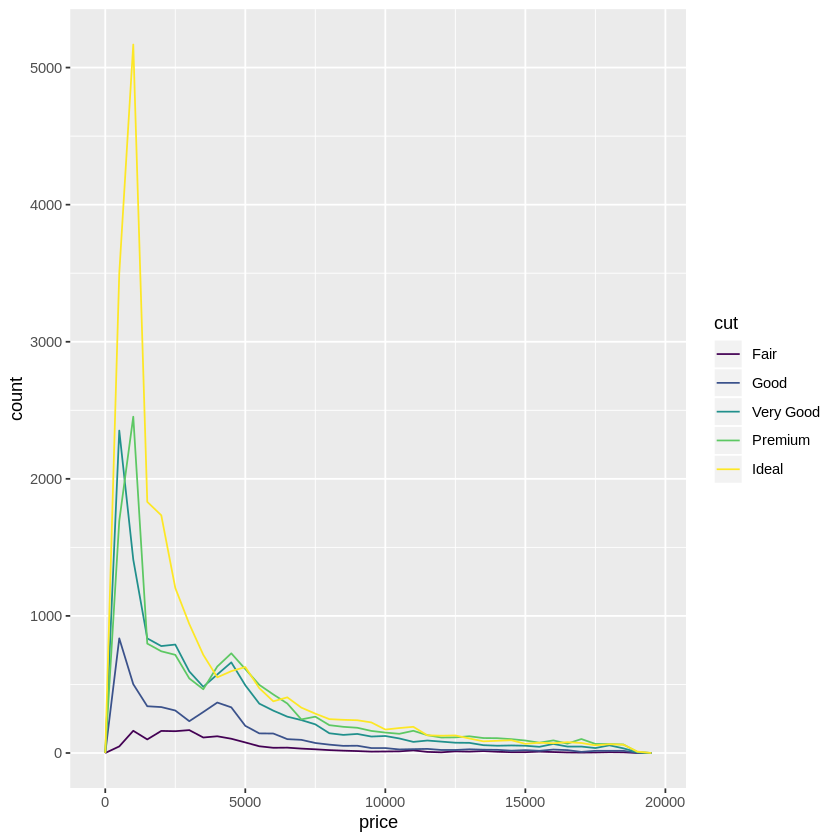

In [2]:
ggplot(data = diamonds, mapping = aes(x = price)) + 
  geom_freqpoly(mapping = aes(colour = cut), binwidth = 500)

Hard to see difference among the distributions because there are so many more ideal diamonds in our datasets compared to, say, fair diamonds.

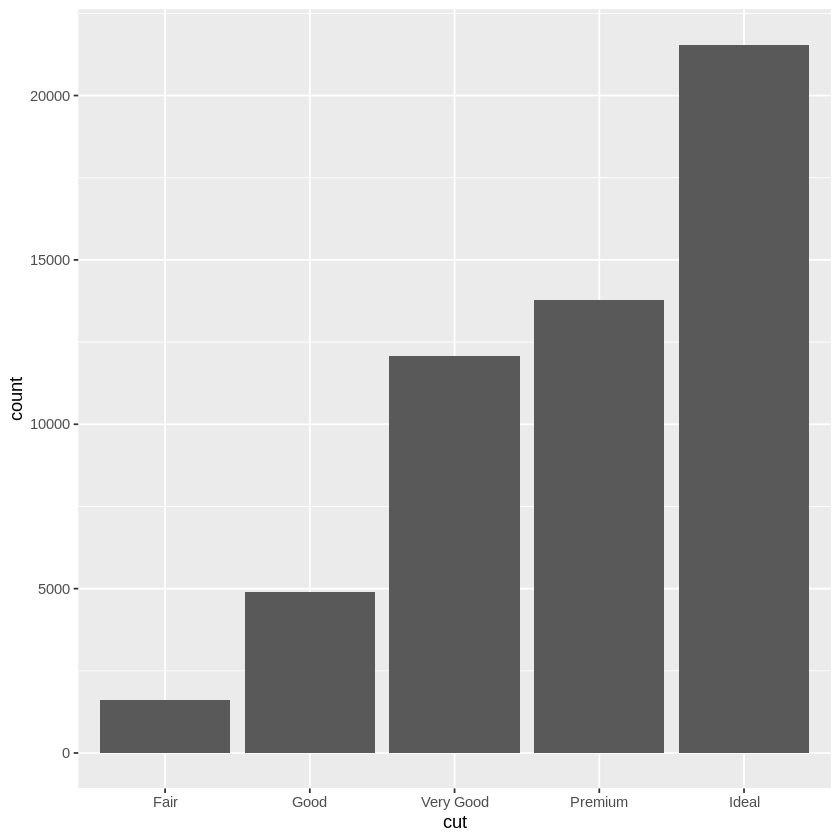

In [3]:
ggplot(diamonds) + 
  geom_bar(mapping = aes(x = cut))

Instead of having counts on the y-axis we need to plot densities. Densities are representations of the distribution which have to integrate to 1.

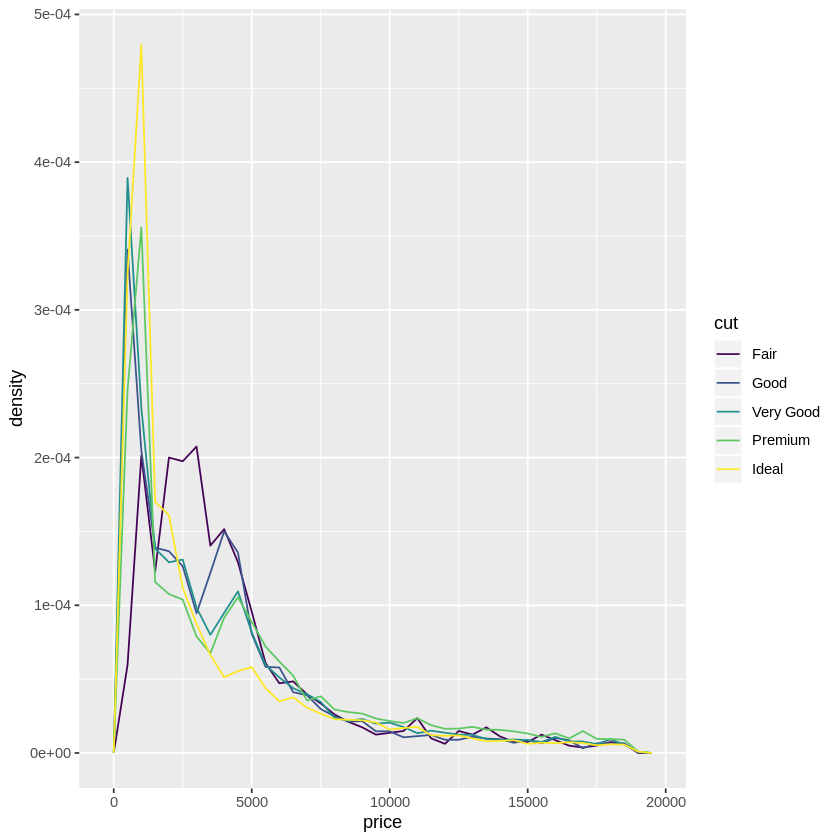

In [4]:
# .. is identifier. In HW2, y=sqrt(..count..)
ggplot(data = diamonds, mapping = aes(x = price, y = ..density..)) + 
  geom_freqpoly(mapping = aes(colour = cut), binwidth = 500)

Looks like Fair diamonds have the highest average price?

Another way of examining the distribution of a continuous variable broken down by a categorical variable is by using boxplots.

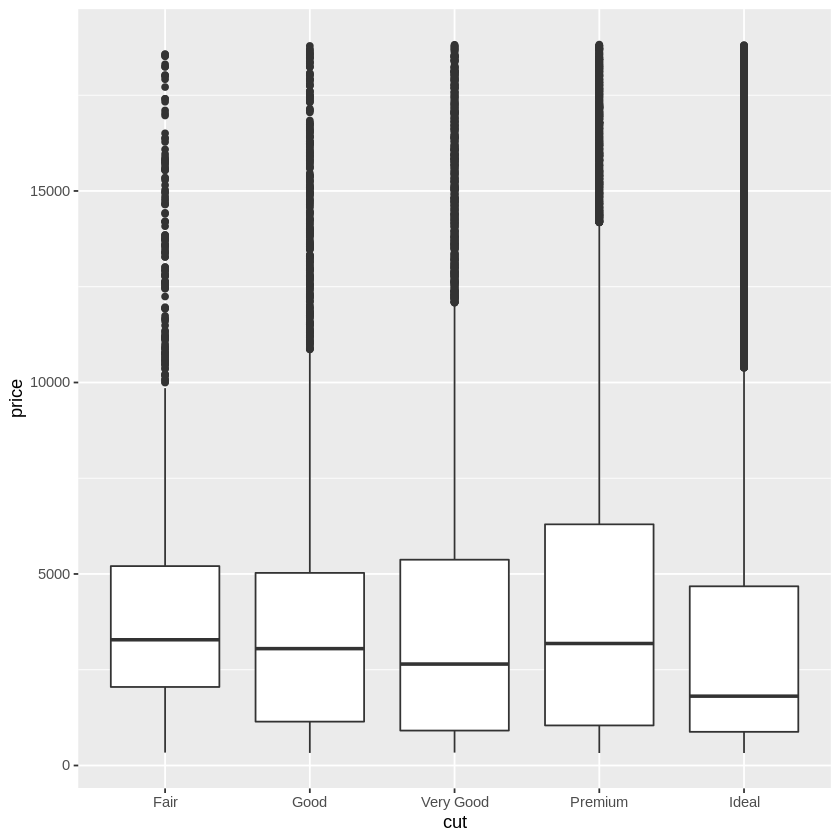

In [5]:
ggplot(data = diamonds, mapping = aes(x = cut, y = price)) +
  geom_boxplot()

Looks like it does seem like Fair diamonds have higher median price than higher quality diamonds.

When visualizing boxplots, you can reorder the categorical variables in cases where the categories do not have an intrinsic ordering. For instance take the "class" column of the mpg dataset.

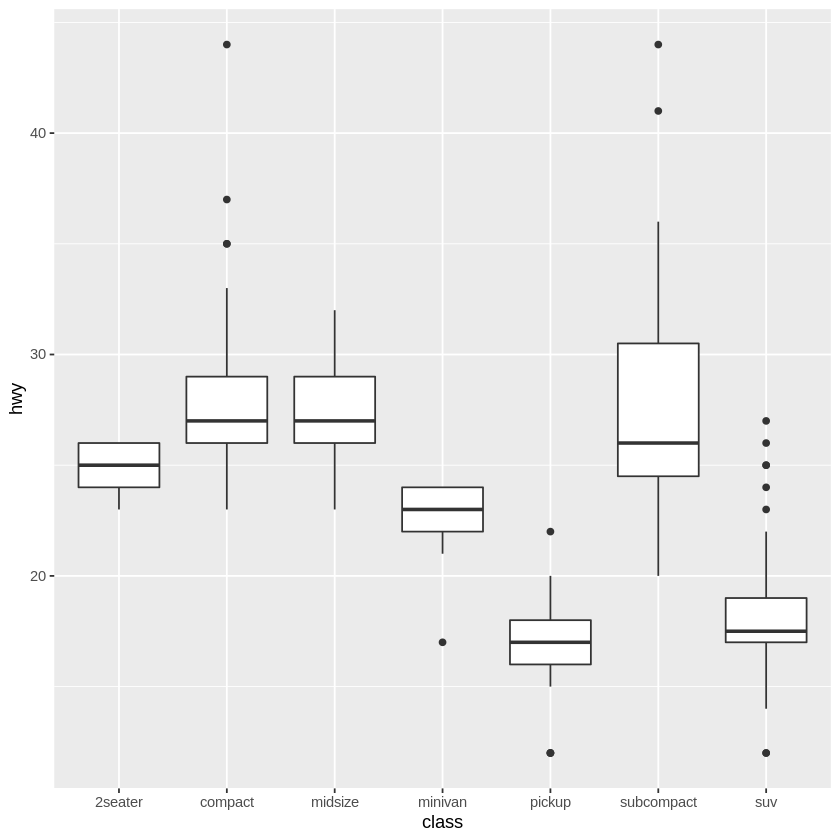

In [6]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +
  geom_boxplot()

We can order the class categories based on the median of each class

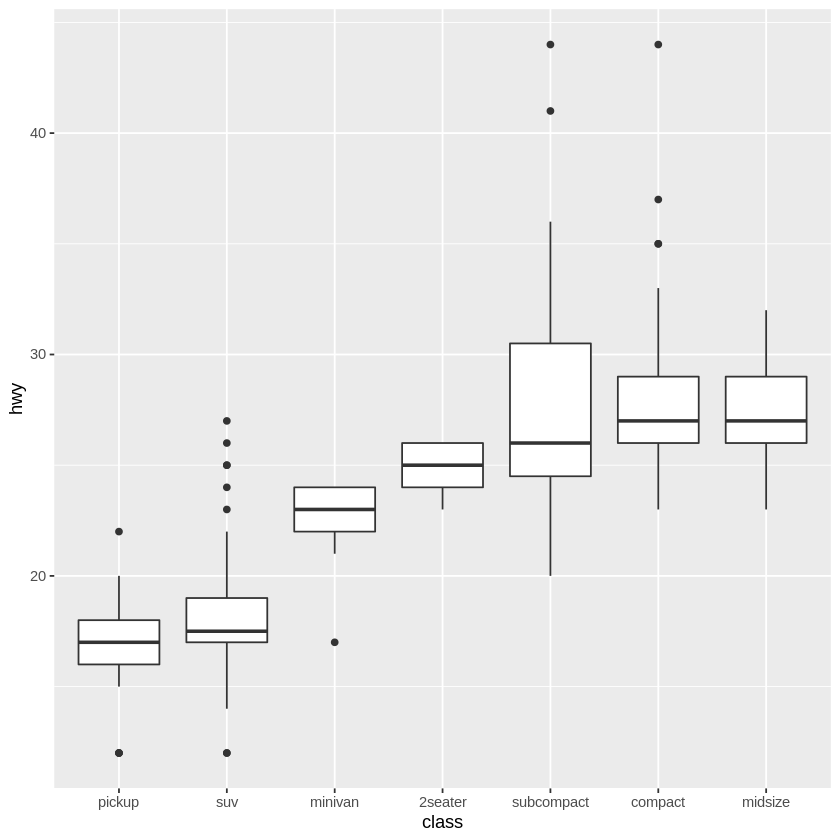

In [7]:
ggplot(data = mpg) +
  geom_boxplot(mapping = aes(x = reorder(class, hwy, FUN = median), y = hwy)) +
  xlab('class')

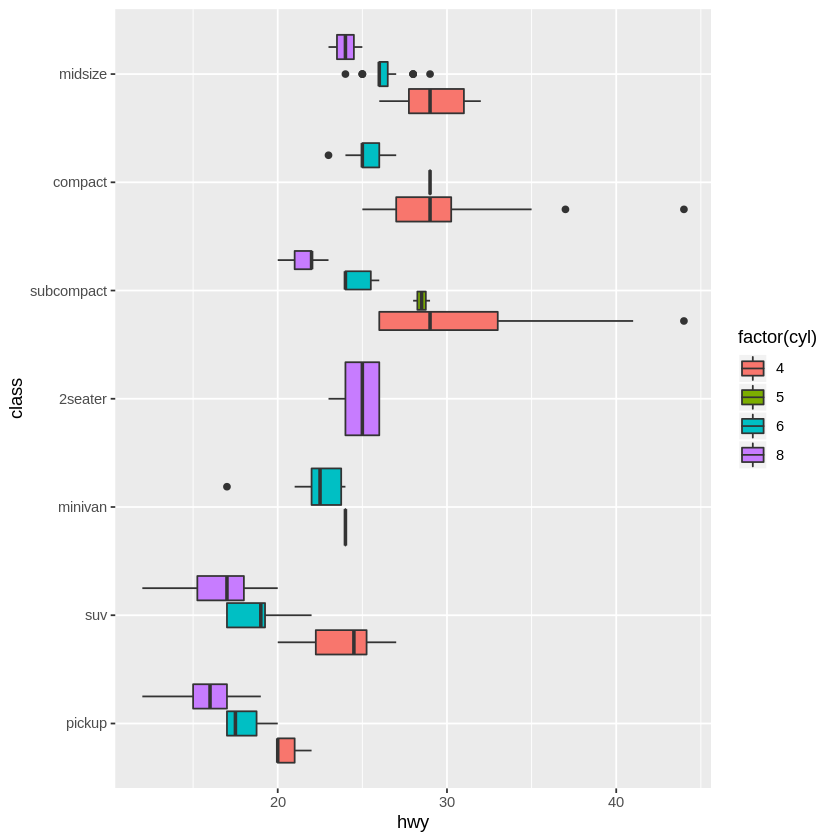

In [8]:
ggplot(data = mpg) +
  geom_boxplot(mapping = aes(x = reorder(class, hwy, FUN = median), y = hwy, fill = factor(cyl))) +
  coord_flip() + 
  xlab('class')

### **Two categorical variables**
To find the covariation between two categorical variables, use the geom_count method.

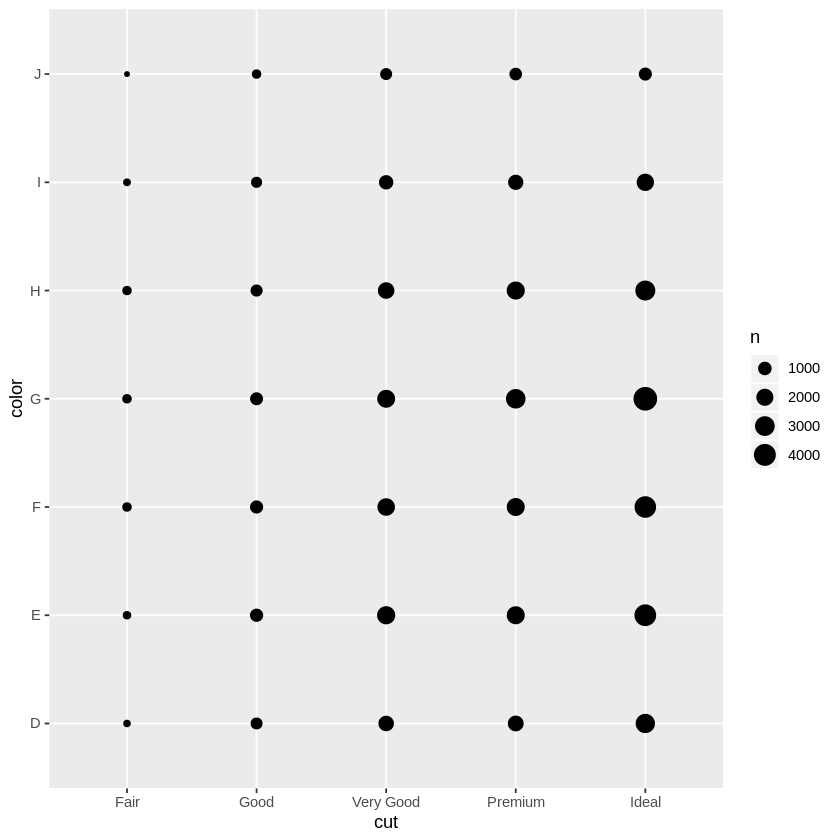

In [9]:
ggplot(data = diamonds) +
  geom_count(mapping = aes(x = cut, y = color))

If you want a more tabulated output, use `count( )`

In [10]:
diamonds %>% 
  count(color, cut)

color,cut,n
<ord>,<ord>,<int>
D,Fair,163
D,Good,662
D,Very Good,1513
D,Premium,1603
D,Ideal,2834
E,Fair,224
E,Good,933
E,Very Good,2400
E,Premium,2337


Then visualize using geom_tile and fill ( ) aesthetic.

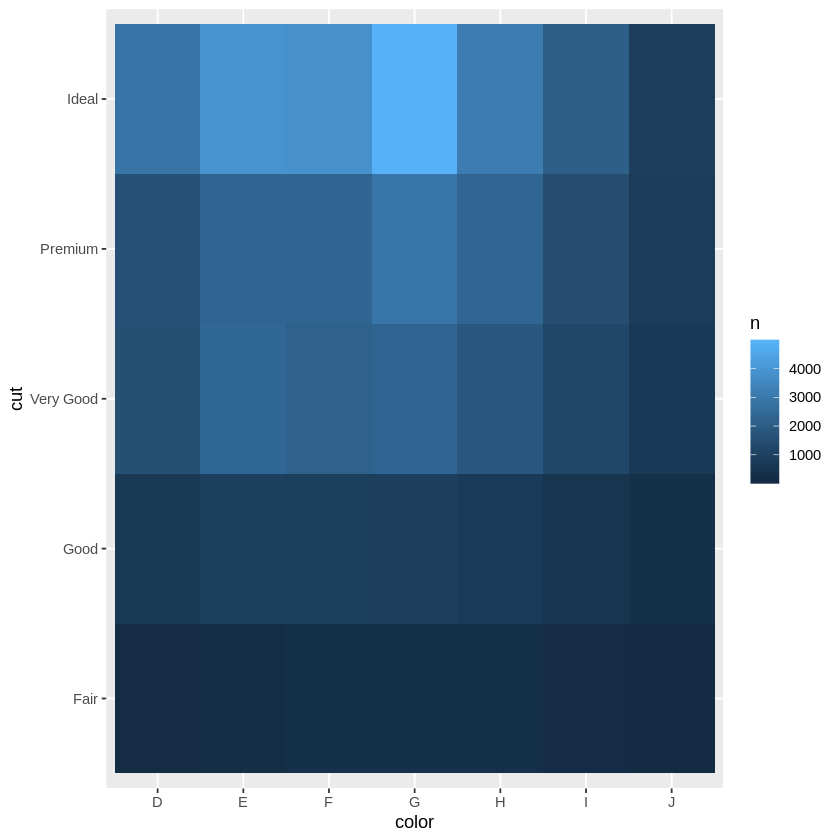

In [11]:
diamonds %>% 
  count(color, cut) %>%  
  ggplot(mapping = aes(x = color, y = cut)) +
    geom_tile(mapping = aes(fill = n))

## **Exercise**

Zillow provides data on home prices, including median rental price per square feet and the median estimated home value. 

In [12]:
zillow_url1 <- paste0("http://files.zillowstatic.com/research/public/City/",
                    "City_MedianRentalPricePerSqft_AllHomes.csv")
zillow_url2 <- paste0("http://files.zillowstatic.com/research/public/City/",
                      "City_ZriPerSqft_AllHomes.csv")
price_per_sqft <- read_csv(zillow_url1) 

Parsed with column specification:
cols(
  .default = col_double(),
  RegionName = col_character(),
  State = col_character(),
  Metro = col_character(),
  CountyName = col_character()
)

See spec(...) for full column specifications.



In [13]:
value_per_sqft <- read_csv(zillow_url2) 

Parsed with column specification:
cols(
  .default = col_double(),
  RegionName = col_character(),
  State = col_character(),
  Metro = col_character(),
  CountyName = col_character()
)

See spec(...) for full column specifications.



In [14]:
# First, we tidy the datasets:
price_per_sqft <- price_per_sqft %>%
    select(-Metro) %>%
    gather(`2010-01`:`2018-08`, key = "date", value = "price") 
value_per_sqft <- value_per_sqft %>%
    select(RegionID:CountyName, `2011-01`:`2018-08`) %>%
    gather(`2011-01`:`2018-08`, key = "date", value = "value") 
# Do the inner join:
home_per_sqft <- price_per_sqft %>%
    inner_join(value_per_sqft)

Joining, by = c("RegionName", "State", "CountyName", "date")



In [15]:
# Format dates:
home_per_sqft <- home_per_sqft %>%
    mutate(date = paste0(date, "-01"),
           date = as.Date(date))
# We filter to only top 10 priciest states this year
# excluding DC and HI:
top10_States <- home_per_sqft %>%
    filter(date >= as.Date("2018-01-01")) %>%
    filter(State != "HI", State != "DC") %>%
    group_by(State) %>%
    summarise(price = mean(price, na.rm = TRUE)) %>%
    top_n(10)

Selecting by price



In [0]:
home_per_sqft <- home_per_sqft %>%
    filter(State %in% top10_States$State)

The most expensive states by median home price per sq. ft. are:

In [17]:
top10_States$State

[1] "CA" "CO" "CT" "MA" "MD" "ME" "NH" "NJ" "NY" "RI"

1.   For year 2018, using the filtered `home_per_sqft` dataset show the relationship between the value and the price per square foot of homes in 10 chosen states. The value is a dollar-denominated and estimated by Zillow.
 *   Is there a correlation between the price and the value per square foot?
 *   Are there any atypical trends you observe?
 *   Are there any clusters of regions that are pricier than, expected based on their estimated value? Find, the `RegionName` for an example these outliers, and see if it makes sense.
 *   Are there any clusters of regions that have higher value than, expected based on how cheap they are? Find, the `RegionName` for an example of these outliers, and see if it makes sense.
2.   Collapse the data by computing the average of the median home price per square foot for each (state, date) pair. Then show the price trend over time for each of the top 10 states.
3.   Now, subset your `home_per_sqft` dataset to homes located in the Bay Area:

In [0]:
bayarea_counties <- c("Alameda County", "Napa County", "Santa Clara County", "Contra Costa County", 
                      "San Francisco County", "Solano County", "Marin County", "San Mateo County", 
                      "Sonoma County")

Filter your observations to the once after “2013-09-01”. Then generate a boxplot of home prices per square foot for the following regions:

In [0]:
cities <- c("Oakland", "San Francisco", "Berkeley", "San Jose",
            "San Mateo", "Redwood City", "Mountain View", "Napa",
            "South San Francisco", "Menlo Park", "Cupertino")

For which region were the median home prices per square foot highest over the most recent 5 years period?